In [96]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
from numpy import average
import datetime as dt
from datetime import datetime
from matplotlib.pyplot import figure
import seaborn as sns

In [97]:
#import CSVs, assign headers and remove quotations from column headers
hours = pd.read_csv(r'C:\Users\Killian\Projects\Bike\Bike-Sharing-Dataset\hour.csv', sep=',',header=0, engine='python')

days = pd.read_csv(r'C:\Users\Killian\Projects\Bike\Bike-Sharing-Dataset\day.csv', sep=',',header=0, engine='python')

In [98]:
#checking if hours info consistent with description
hours.info()
#print(hours.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [99]:
#checking if day info consistent with description
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [100]:
17379/731
#Should merge both datasets? Or only use day?
# Might be interesting to refer to day if easier for some trend analysis.

23.774281805745552

In [101]:
display(days.head())
display(hours.head(25))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.3,0.4,0.8,0.2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.4,0.4,0.7,0.2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.2,0.2,0.4,0.2,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2,0.2,0.6,0.2,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.2,0.2,0.4,0.2,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.2,0.3,0.8,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.2,0.3,0.8,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.2,0.3,0.8,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.2,0.3,0.8,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.2,0.3,0.8,0.0,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.2,0.3,0.8,0.1,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.2,0.3,0.8,0.0,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.3,0.9,0.0,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.2,0.3,0.8,0.0,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.3,0.3,0.8,0.0,8,6,14


In [102]:
#%reset

In [103]:
#Convert time and date into timestamp objects 

t= hours['hr']
hours['hr'] = pd.to_datetime(t, format='%H').dt.time

d = hours['dteday']
hours['dteday'] = pd.to_datetime(d).dt.date


day = days['dteday']
days['dteday'] = pd.to_datetime(day)
#for day in days:
#    days['dteday'] = dt.datetime.strptime(day, '%y/%m/%d')

In [104]:
#Combine time and date into one column
hours['dteday'] = hours.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)

<ipython-input-104-ca770c6192b0>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  hours['dteday'] = hours.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)


In [105]:
#check that format is correct with no unexpected errors
display(hours.head(5))
display(days.head(5))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,1,00:00:00,0,6,0,1,0.2,0.3,0.8,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,1,01:00:00,0,6,0,1,0.2,0.3,0.8,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,1,02:00:00,0,6,0,1,0.2,0.3,0.8,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,1,03:00:00,0,6,0,1,0.2,0.3,0.8,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,1,04:00:00,0,6,0,1,0.2,0.3,0.8,0.0,0,1,1


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.3,0.4,0.8,0.2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.4,0.4,0.7,0.2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.2,0.2,0.4,0.2,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2,0.2,0.6,0.2,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.2,0.2,0.4,0.2,82,1518,1600


In [106]:
#Remove unwanted columns: Instant (Index, redundant), yr (Year, redundant), mnth (Month, redundant), hr (Hour, redundant), workingday (Working day, redundant)
hours = hours.drop(columns=['instant', 'yr', 'mnth', 'hr', 'workingday'])
days = days.drop(columns=['instant', 'yr', 'mnth', 'workingday'])


Text(0.5, 1.0, 'Daily correlation heatmap')

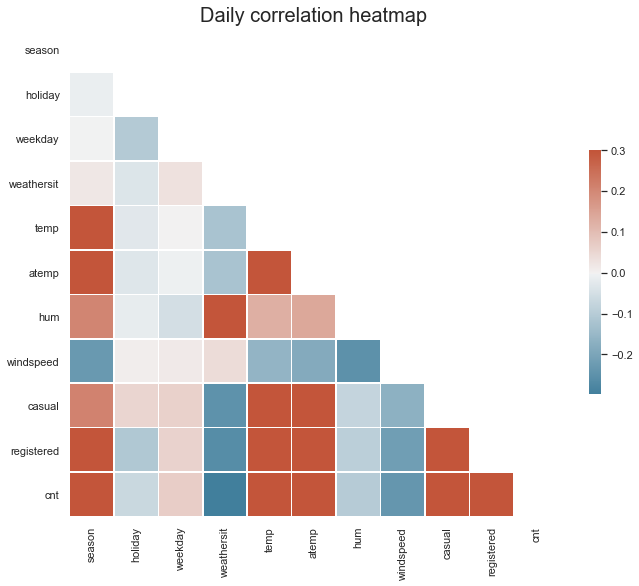

In [107]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = days.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Daily correlation heatmap', fontsize=20)


Text(0.5, 1.0, 'Hourly correlation heatmap')

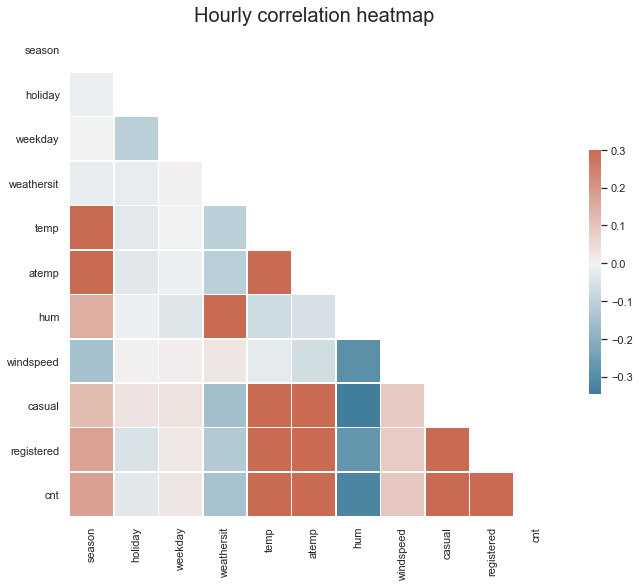

In [108]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = hours.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Hourly correlation heatmap', fontsize=20)

In [109]:
#Convert other columns to meaningful data. Refer to readme for legend.
#Spring equinox Northern hemisphere is on March 20th
#+ weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Hailstones + Thunderstorm + Mist, Snow + Fog

hours.loc[hours['holiday'] == 0, 'holiday'] = 'No'
hours.loc[hours['holiday'] == 1, 'holiday'] = 'Yes'

hours.loc[hours['season'] == 1, 'season'] = 'Winter'
hours.loc[hours['season'] == 2, 'season'] = 'Spring'
hours.loc[hours['season'] == 3, 'season'] = 'Summer'
hours.loc[hours['season'] == 4, 'season'] = 'Autumn'

hours.loc[hours['weekday'] == 0, 'weekday'] = 'Sun'
hours.loc[hours['weekday'] == 1, 'weekday'] = 'Mon'
hours.loc[hours['weekday'] == 2, 'weekday'] = 'Tue'
hours.loc[hours['weekday'] == 3, 'weekday'] = 'Wed'
hours.loc[hours['weekday'] == 4, 'weekday'] = 'Thu'
hours.loc[hours['weekday'] == 5, 'weekday'] = 'Fri'
hours.loc[hours['weekday'] == 6, 'weekday'] = 'Sat'

hours.loc[hours['weathersit'] == 1, 'weathersit'] = 'Clear'
hours.loc[hours['weathersit'] == 2, 'weathersit'] = 'Misty'
hours.loc[hours['weathersit'] == 3, 'weathersit'] = 'Bad'
hours.loc[hours['weathersit'] == 4, 'weathersit'] = 'Terrible'



days.loc[days['holiday'] == 0, 'holiday'] = 'No'
days.loc[days['holiday'] == 1, 'holiday'] = 'Yes'

days.loc[days['season'] == 1, 'season'] = 'Winter'
days.loc[days['season'] == 2, 'season'] = 'Spring'
days.loc[days['season'] == 3, 'season'] = 'Summer'
days.loc[days['season'] == 4, 'season'] = 'Autumn'

days.loc[days['weekday'] == 0, 'weekday'] = 'Sun'
days.loc[days['weekday'] == 1, 'weekday'] = 'Mon'
days.loc[days['weekday'] == 2, 'weekday'] = 'Tue'
days.loc[days['weekday'] == 3, 'weekday'] = 'Wed'
days.loc[days['weekday'] == 4, 'weekday'] = 'Thu'
days.loc[days['weekday'] == 5, 'weekday'] = 'Fri'
days.loc[days['weekday'] == 6, 'weekday'] = 'Sat'

days.loc[days['weathersit'] == 1, 'weathersit'] = 'Clear'
days.loc[days['weathersit'] == 2, 'weathersit'] = 'Misty'
days.loc[days['weathersit'] == 3, 'weathersit'] = 'Bad'
days.loc[days['weathersit'] == 4, 'weathersit'] = 'Terrible'

In [110]:
#check that format is correct with no unexpected errors
display(hours.head(5))
display(days.head(5))

,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,Winter,No,Sat,Clear,0.2,0.3,0.8,0.0,3,13,16
1,2011-01-01 01:00:00,Winter,No,Sat,Clear,0.2,0.3,0.8,0.0,8,32,40
2,2011-01-01 02:00:00,Winter,No,Sat,Clear,0.2,0.3,0.8,0.0,5,27,32
3,2011-01-01 03:00:00,Winter,No,Sat,Clear,0.2,0.3,0.8,0.0,3,10,13
4,2011-01-01 04:00:00,Winter,No,Sat,Clear,0.2,0.3,0.8,0.0,0,1,1


,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,No,Sat,Misty,0.3,0.4,0.8,0.2,331,654,985
1,2011-01-02,Winter,No,Sun,Misty,0.4,0.4,0.7,0.2,131,670,801
2,2011-01-03,Winter,No,Mon,Clear,0.2,0.2,0.4,0.2,120,1229,1349
3,2011-01-04,Winter,No,Tue,Clear,0.2,0.2,0.6,0.2,108,1454,1562
4,2011-01-05,Winter,No,Wed,Clear,0.2,0.2,0.4,0.2,82,1518,1600


In [111]:
#Get actual temperature/humidity/windspeed values
#temp: Normalized temperature in Celsius. The values are divided to 41 (max)
#atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
#hum: Normalized humidity. The values are divided to 100 (max) (UNITS??? Possibly relative humidity)
#windspeed: Normalized wind speed. The values are divided to 67 (max) (UNITS???)
hours['temp'] = hours['temp'].apply(lambda x: ((x*47)-8))
hours['atemp'] = hours['atemp'].apply(lambda x:  ((x*66)-16))
hours['hum'] = hours['hum'].apply(lambda x: x*100)
hours['windspeed'] = hours['windspeed'].apply(lambda x: x*67)

#days['temp'] = days['temp'].apply(lambda x: x*41)
#days['atemp'] = days['atemp'].apply(lambda x: x*50)
days['hum'] = days['hum'].apply(lambda x: x*100)
days['windspeed'] = days['windspeed'].apply(lambda x: x*67)


In [112]:
#check that format is correct with no unexpected errors
display(hours.head(5))
display(days.head(5))

,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,Winter,No,Sat,Clear,3.3,3.0,81.0,0.0,3,13,16
1,2011-01-01 01:00:00,Winter,No,Sat,Clear,2.3,2.0,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Winter,No,Sat,Clear,2.3,2.0,80.0,0.0,5,27,32
3,2011-01-01 03:00:00,Winter,No,Sat,Clear,3.3,3.0,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,Winter,No,Sat,Clear,3.3,3.0,75.0,0.0,0,1,1


,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,No,Sat,Misty,0.3,0.4,80.6,10.7,331,654,985
1,2011-01-02,Winter,No,Sun,Misty,0.4,0.4,69.6,16.7,131,670,801
2,2011-01-03,Winter,No,Mon,Clear,0.2,0.2,43.7,16.6,120,1229,1349
3,2011-01-04,Winter,No,Tue,Clear,0.2,0.2,59.0,10.7,108,1454,1562
4,2011-01-05,Winter,No,Wed,Clear,0.2,0.2,43.7,12.5,82,1518,1600


In [113]:
pd.options.display.float_format = '{:,.1f}'.format

In [114]:
hours.info()
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   holiday     17379 non-null  object        
 3   weekday     17379 non-null  object        
 4   weathersit  17379 non-null  object        
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   hum         17379 non-null  float64       
 8   windspeed   17379 non-null  float64       
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  

In [115]:
hours['holiday'] = pd.Categorical(hours['holiday'], categories=['Yes', 'No'])
hours['season'] = pd.Categorical(hours['season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'])
hours['weekday'] = pd.Categorical(hours['weekday'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])



#hours['mnth'] = pd.Categorical(hours['mnth'],
#categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#hours['yr'] = pd.Categorical(hours['yr'],
#categories=['2011', '2012'])

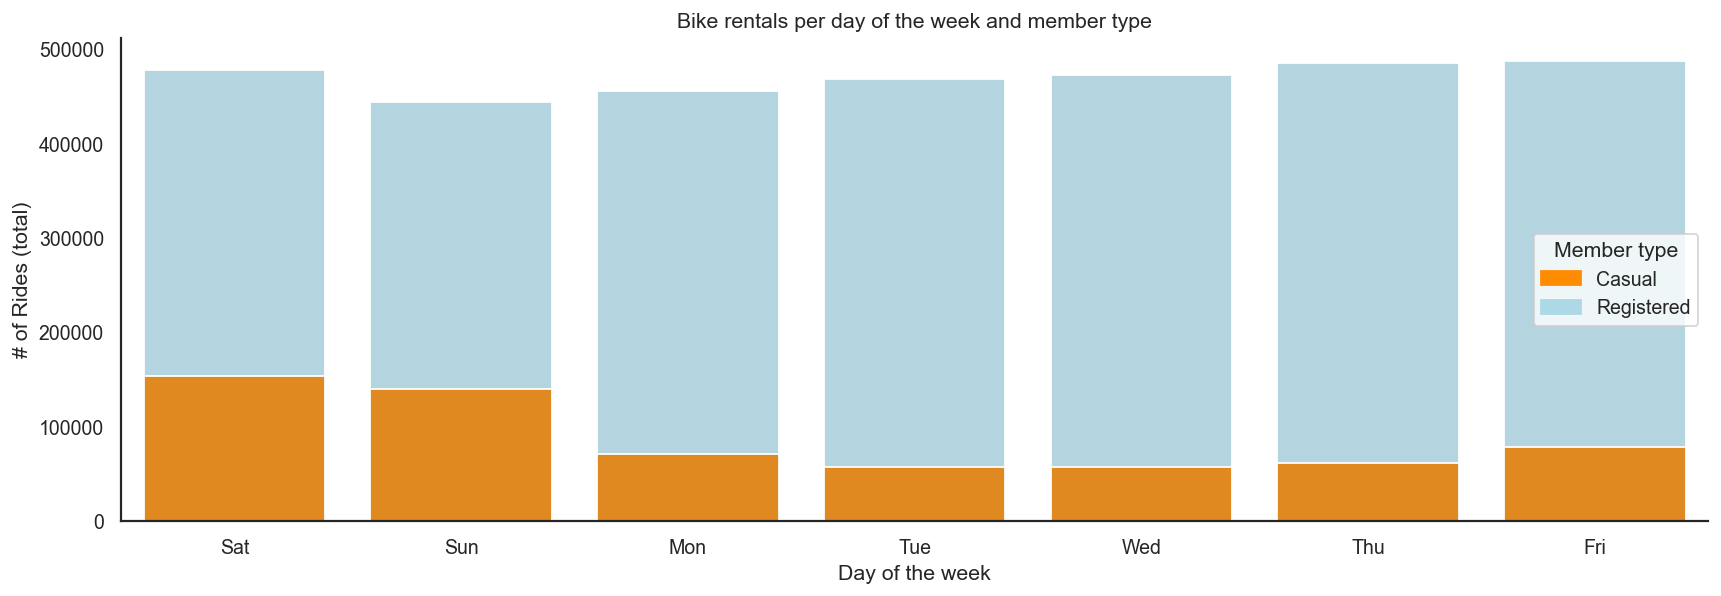

In [116]:
plt.figure(figsize=(16,5), dpi=128)
s1 = sns.barplot(x = 'weekday', y = 'cnt', data = days, estimator=sum, ci=None,  color='lightblue')

s2 = sns.barplot(x = 'weekday', y = 'casual', data = days, estimator=sum, ci=None,  color='darkorange')
#sns.relplot(data=hours, kind="line", ci=None, x='weekday', y="cnt", estimator="sum")

plt.title('Bike rentals per day of the week and member type')
plt.ylabel('# of Rides (total)')
plt.xlabel('Day of the week')
top_bar = mpatches.Patch(color='darkorange', label='Casual')
bottom_bar = mpatches.Patch(color='lightblue', label='Registered')
plt.legend(handles=[top_bar, bottom_bar], title='Member type', loc='center right')
sns.despine()

plt.show()

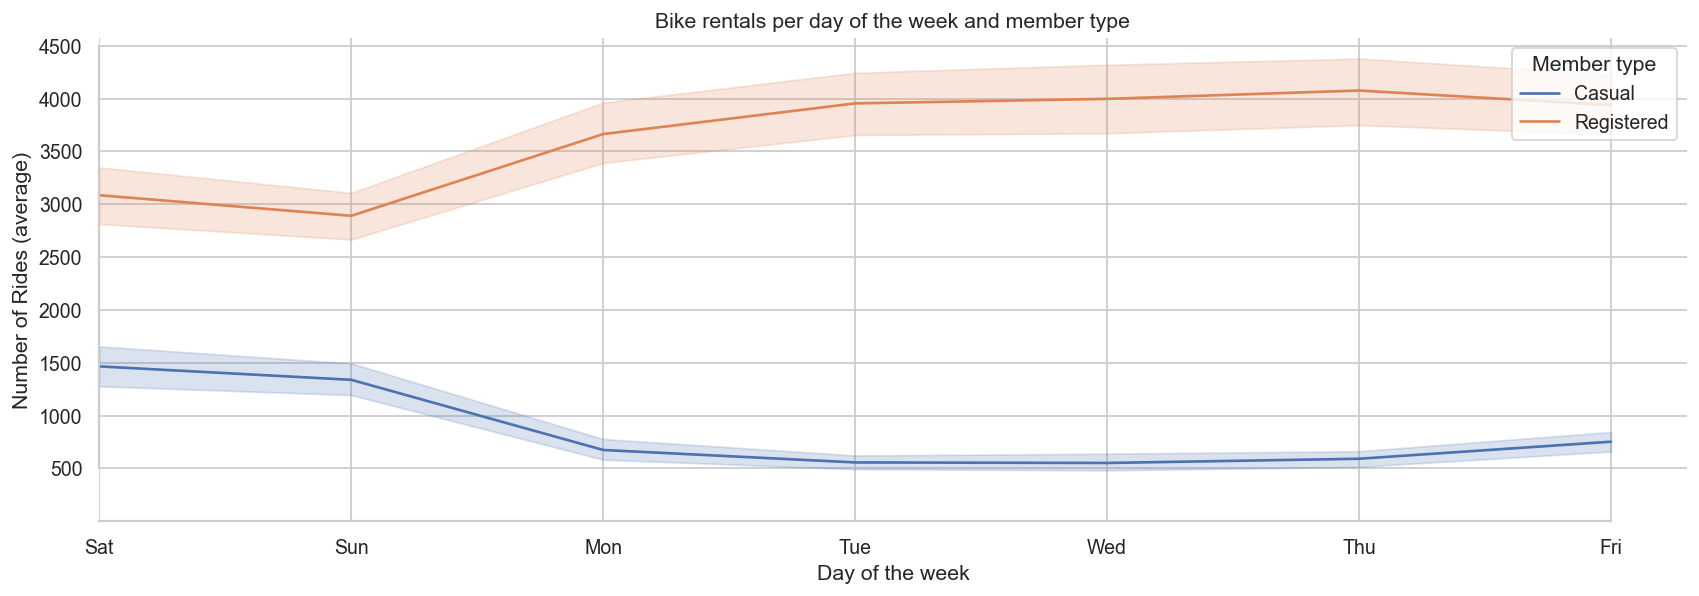

In [117]:
data_preproc = pd.DataFrame({'Day': days["weekday"], 'Casual': days["casual"], 'Registered': days["registered"]})

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
sns.lineplot(x='Day', y='value', hue='variable', data=pd.melt(data_preproc, ['Day']))

plt.title('Bike rentals per day of the week and member type')
plt.ylabel('Number of Rides (average)')
plt.xlabel('Day of the week')
plt.legend(title='Member type', loc='upper right')
sns.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.show()

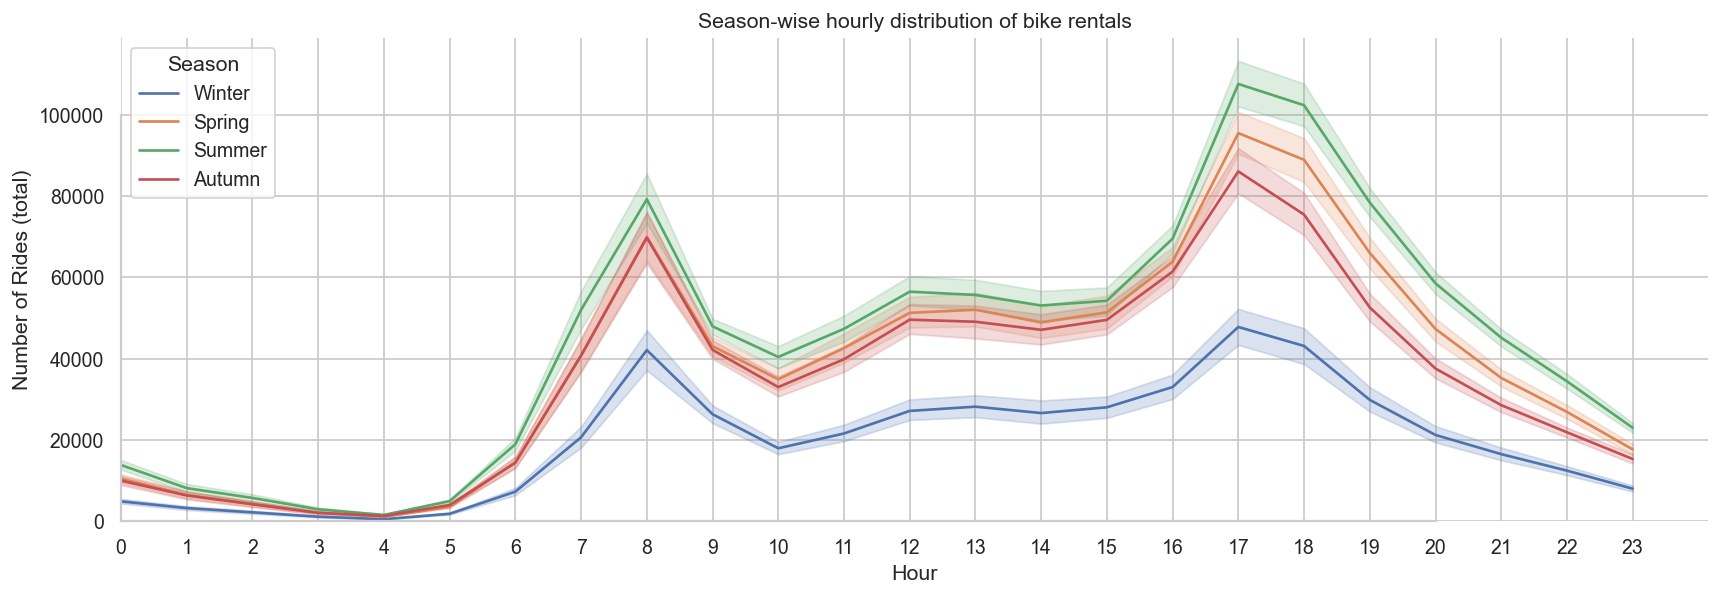

In [118]:
Hour = hours["dteday"].dt.hour

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
sns.lineplot(x=Hour, y='cnt', hue='season', data=hours, estimator=sum)

plt.title('Season-wise hourly distribution of bike rentals')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Hour')
plt.legend(title='Season', loc='upper left')
sns.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

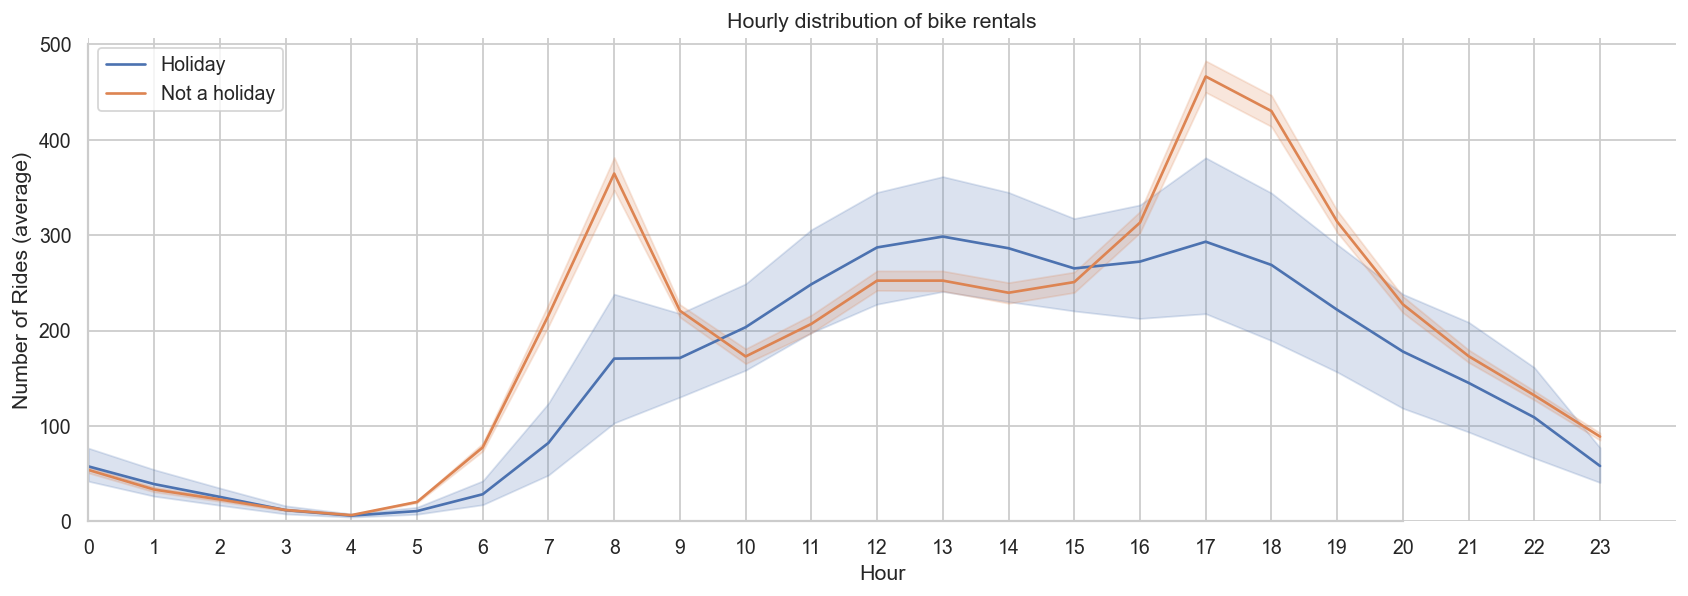

In [119]:
Hour = hours["dteday"].dt.hour

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
sns.lineplot(x=Hour, y='cnt', hue='holiday', data=hours)

plt.title('Hourly distribution of bike rentals')
plt.ylabel('Number of Rides (average)')
plt.xlabel('Hour')
plt.legend(title=None, loc='upper left', labels=["Holiday", "Not a holiday"])
sns.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

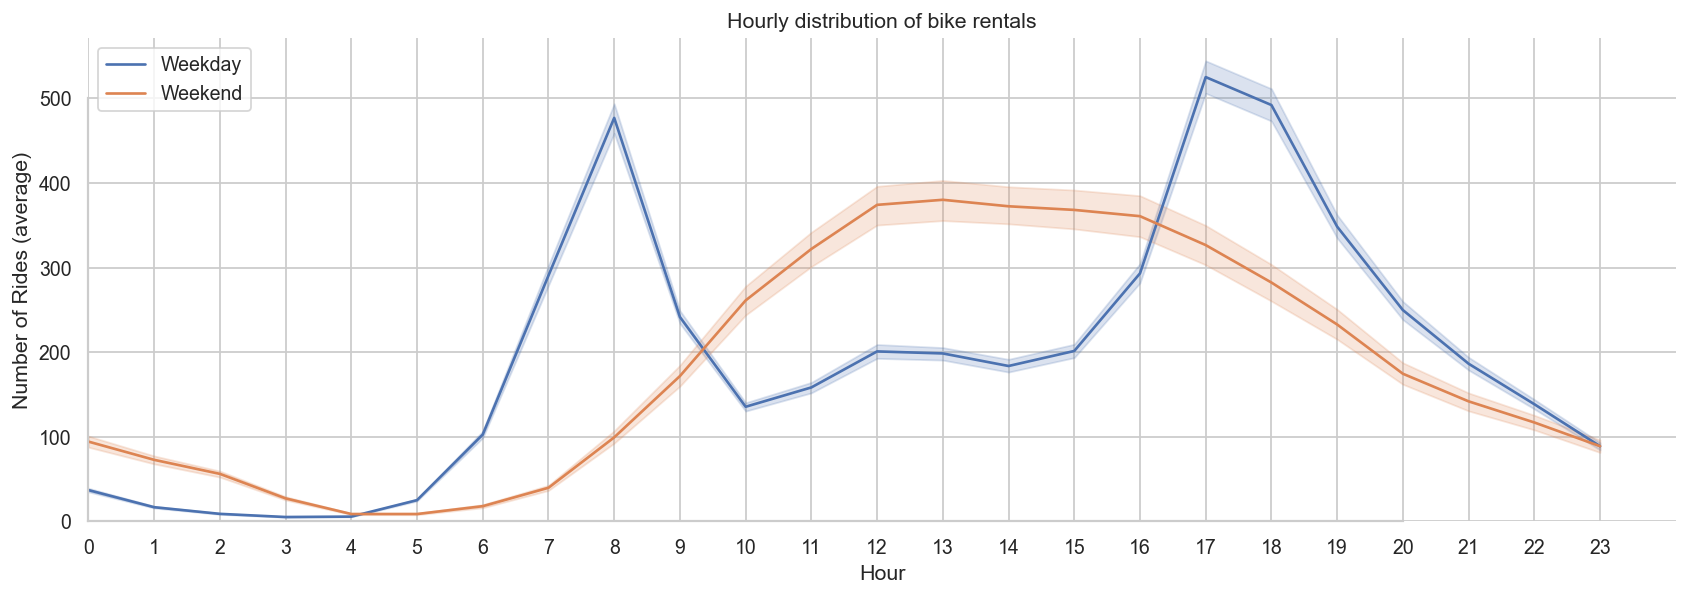

In [120]:
Hour = hours["dteday"].dt.hour

weekday = hours.loc[(hours.holiday == "No") & hours.weekday.isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])]
weekend = hours.loc[hours.weekday.isin(['Sat', 'Sun'])]

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
s1 = sns.lineplot(x=Hour, y='cnt', data=weekday)
s2 = sns.lineplot(x=Hour, y='cnt', data=weekend)
plt.title('Hourly distribution of bike rentals')
plt.ylabel('Number of Rides (average)')
plt.xlabel('Hour')
plt.legend(title=None, loc='upper left', labels=["Weekday", "Weekend"])
sns.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

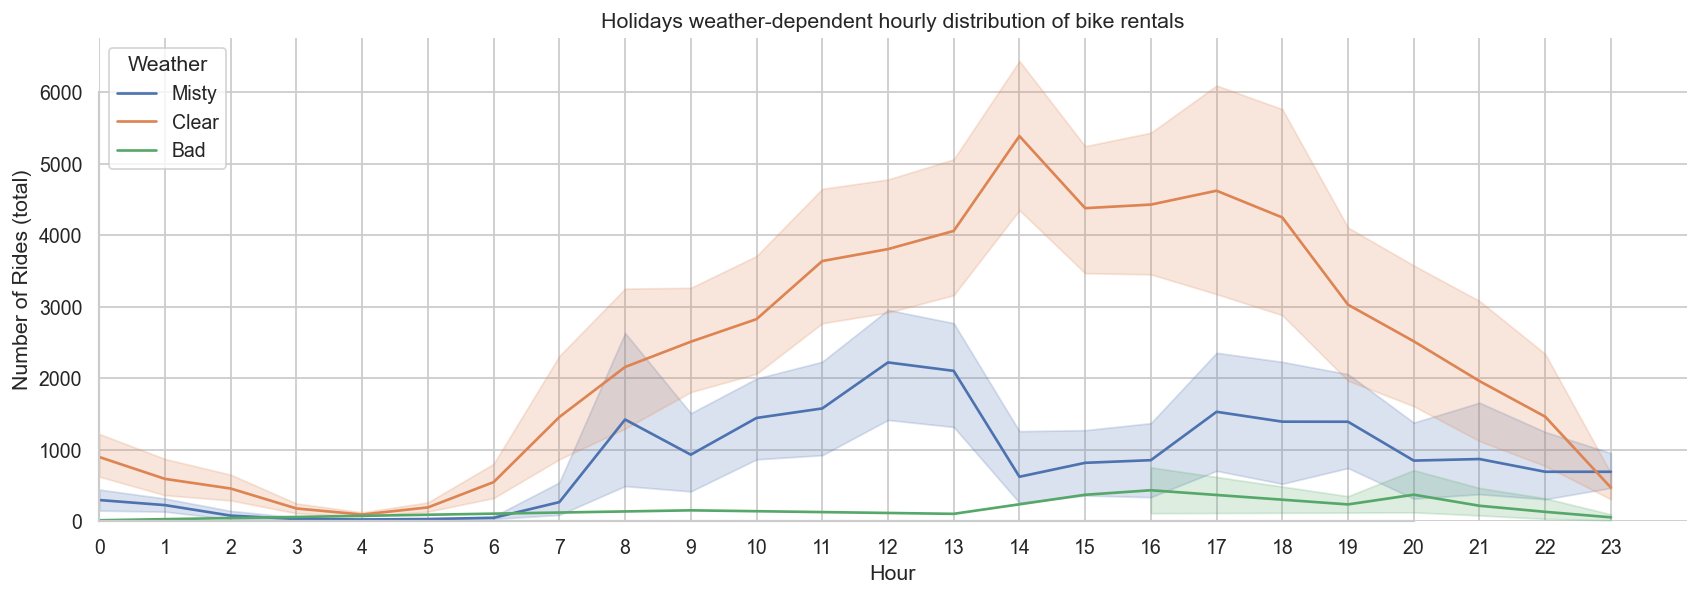

In [121]:
Hour = hours["dteday"].dt.hour
Holiday_hours = hours[hours.holiday == "Yes"]

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
sns.lineplot(x=Hour, y='cnt', hue='weathersit', data=Holiday_hours, estimator=sum)

plt.title('Holidays weather-dependent hourly distribution of bike rentals')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Hour')
plt.legend(title="Weather", loc='upper left')
sns.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

In [122]:
weathers = ["Terrible"]
badweather = hours[hours.weathersit.isin(weathers)]
badweather

,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,2011-01-26 16:00:00,Winter,No,Wed,Terrible,2.3,-3.0,93.0,22.0,1,35,36
8854,2012-01-09 18:00:00,Winter,No,Mon,Terrible,1.4,-1.0,86.0,6.0,6,158,164
9123,2012-01-21 01:00:00,Winter,No,Sat,Terrible,-1.4,-7.0,86.0,13.0,1,22,23


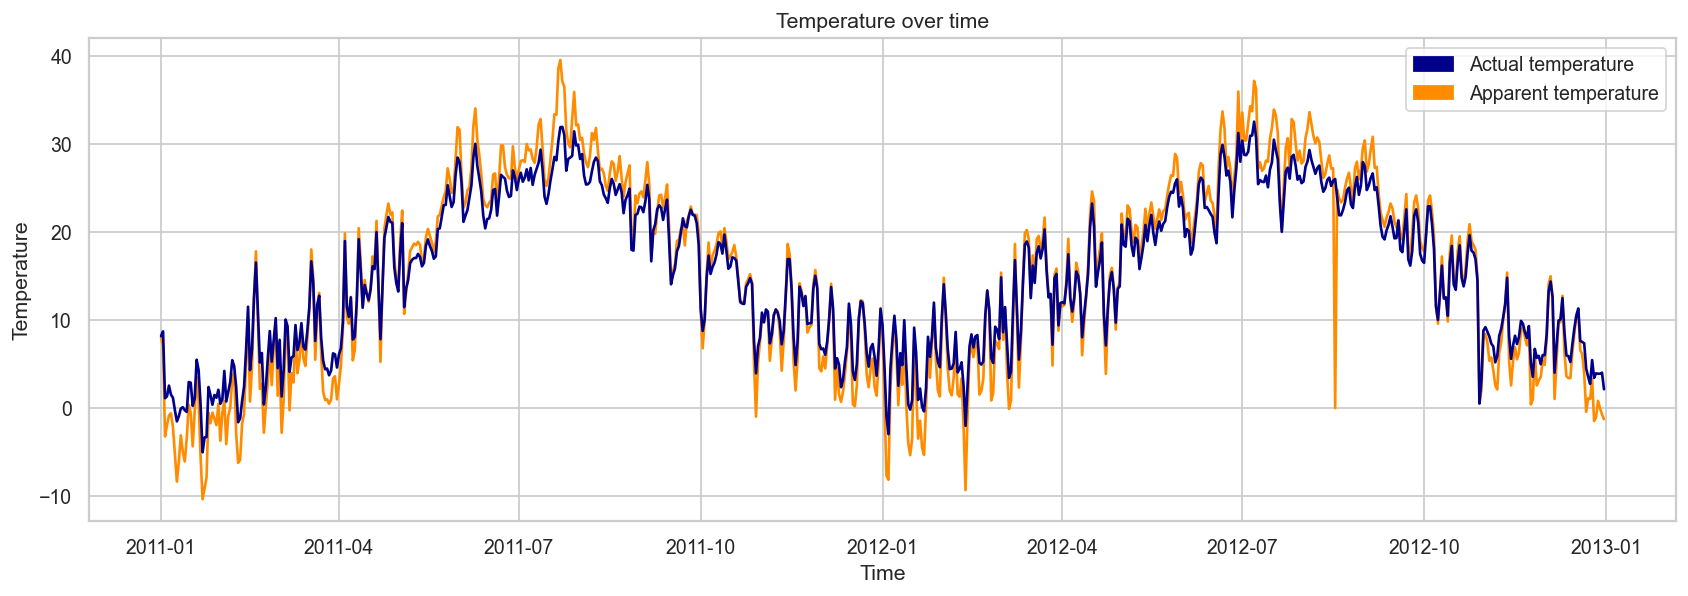

In [123]:
# Set date column as index 
hours_index = hours.set_index('dteday')

# Resample to daily sum of precip
day = hours_index.resample('D').sum()/24

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
s1 = sns.lineplot(x='dteday', y = 'atemp', data=day,color='darkorange')
s2 = sns.lineplot(x='dteday', y = 'temp', data=day, color='darkblue')
plt.title('Temperature over time')
plt.ylabel('Temperature')
plt.xlabel('Time')
top_bar = mpatches.Patch(color='darkblue', label='Actual temperature')
bottom_bar = mpatches.Patch(color='darkorange', label='Apparent temperature')
plt.legend(handles=[top_bar, bottom_bar], loc='upper right')
plt.show()

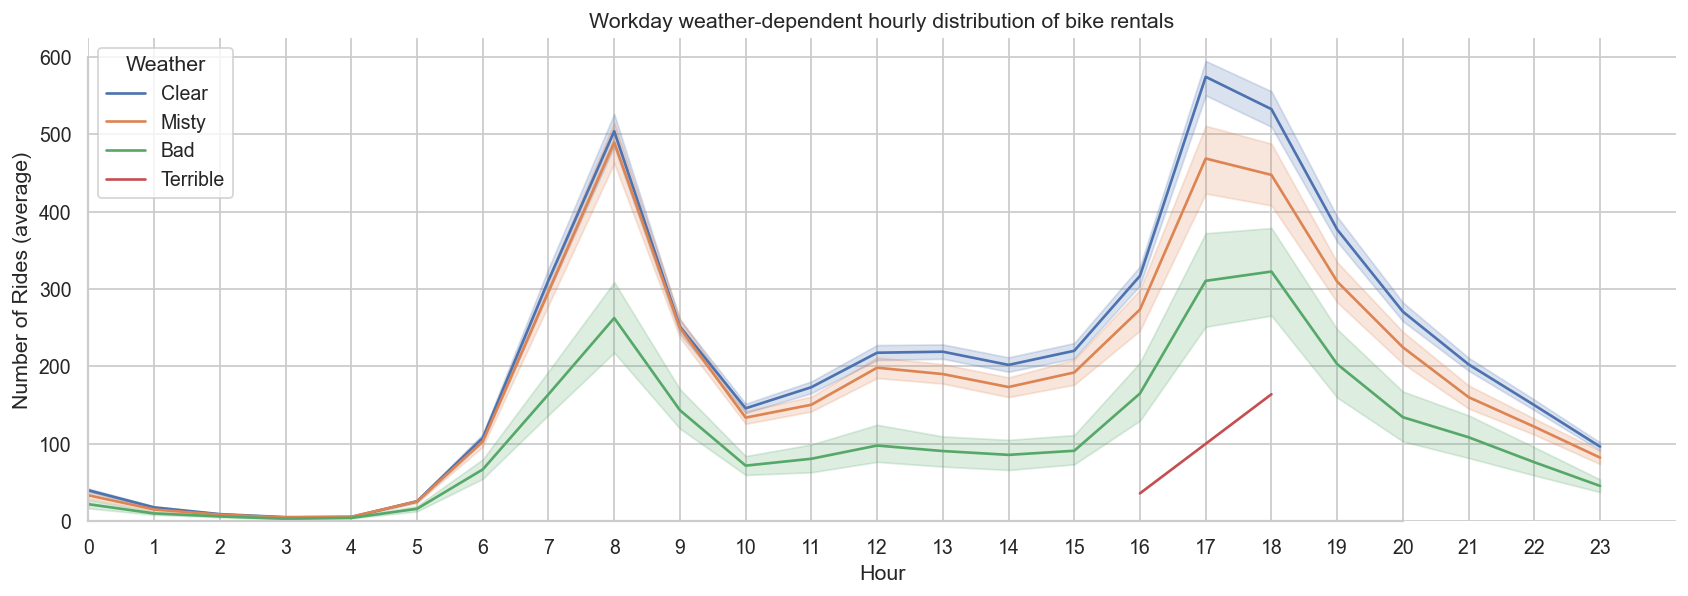

In [124]:
#average is important, otherwise our interpretation is influenced by the number of bad days vs good days etc.

Hour = hours["dteday"].dt.hour
work_hours = hours.loc[(hours.holiday == "No") & hours.weekday.isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])] 

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
sns.lineplot(x=Hour, y='cnt', hue='weathersit', data=work_hours)

plt.title('Workday weather-dependent hourly distribution of bike rentals')
plt.ylabel('Number of Rides (average)')
plt.xlabel('Hour')
plt.legend(title="Weather", loc='upper left')
sns.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

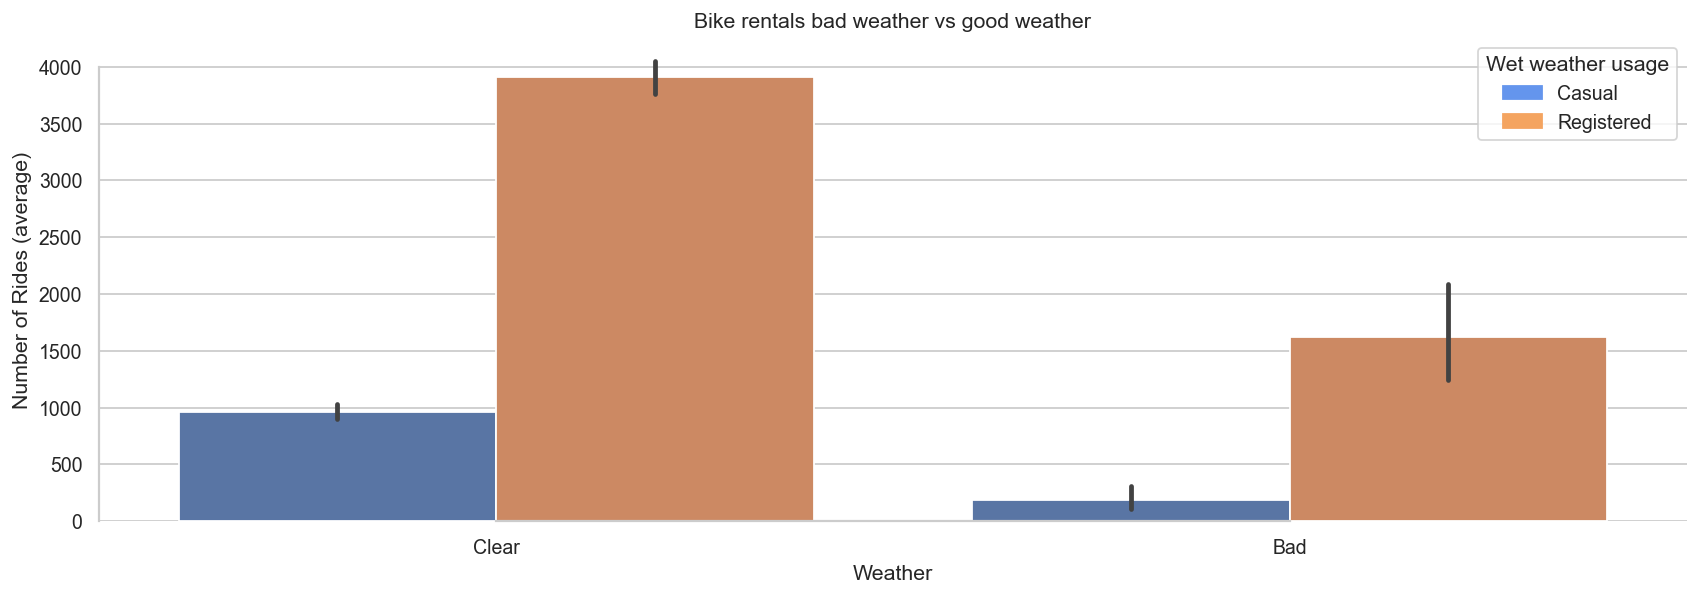

In [125]:
#wet weather usage, registered vs unregistered - say "bad" weather.
#average good vs bad, casual and registered might be better. Not enough bad weather stats.

Wetdry = days.loc[days.weathersit.isin(['Bad', 'Clear'])]
data_preproc = pd.DataFrame({'Weather': Wetdry["weathersit"], 'Casual': Wetdry["casual"], 'Registered': Wetdry["registered"]})

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
sns.barplot(x='Weather', y='value', hue='variable', data=pd.melt(data_preproc, ['Weather']))
plt.title('Bike rentals bad weather vs good weather')
plt.ylabel('Number of Rides (average)')
plt.xlabel('Weather')
top_bar = mpatches.Patch(color='cornflowerblue', label='Casual')
bottom_bar = mpatches.Patch(color='sandybrown', label='Registered')
plt.legend(title='Wet weather usage', handles=[top_bar, bottom_bar], loc='upper right')
sns.despine(trim=True)
plt.show()

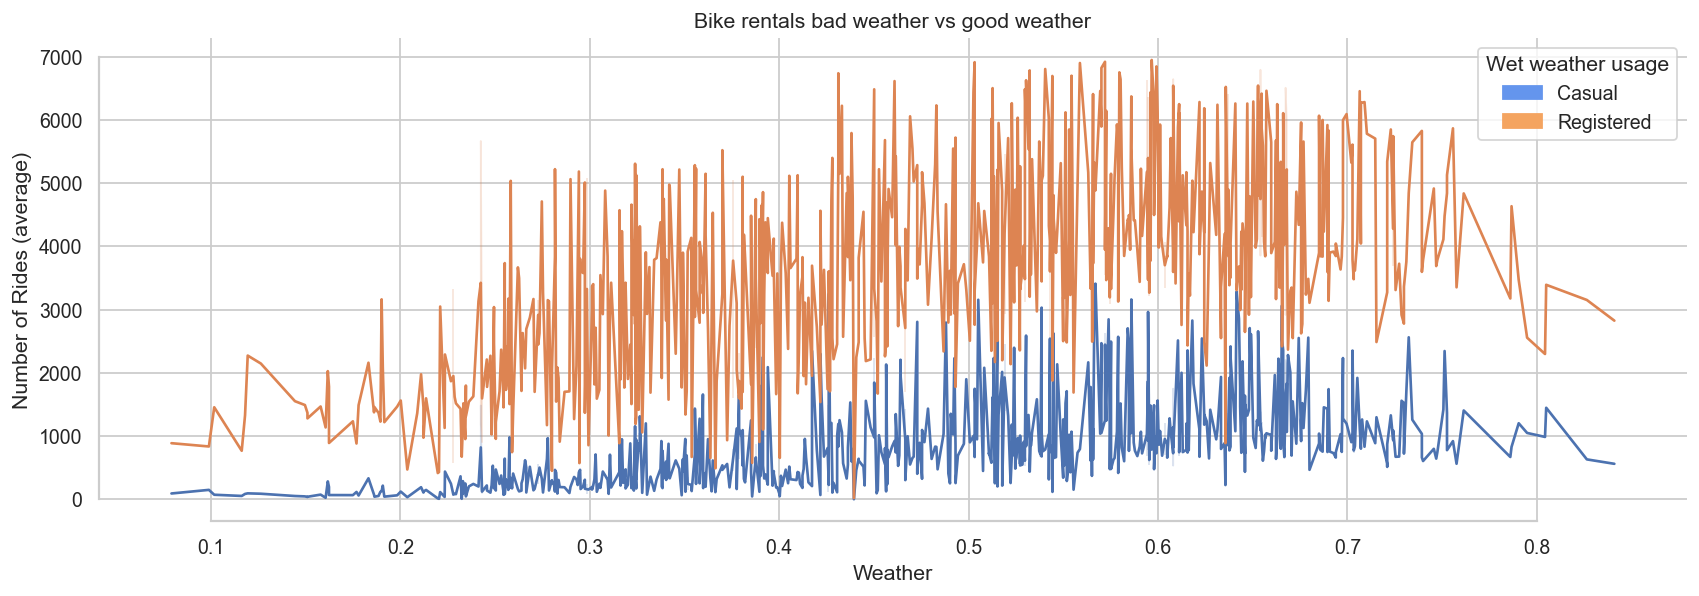

In [143]:
#wet weather usage, registered vs unregistered - say "bad" weather.
#average good vs bad, casual and registered might be better. Not enough bad weather stats.

hot = days.loc[(days.atemp > 30)]
cold = days.loc[(days.atemp < 5)]
Hotcold = hot.append(cold)
data_preproc = pd.DataFrame({'Weather': Hotcold["atemp"], 'Casual': Hotcold["casual"], 'Registered': Hotcold["registered"]})

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
sns.lineplot(x='Weather', y='value', hue='variable', data=pd.melt(data_preproc, ['Weather']))
plt.title('Bike rentals bad weather vs good weather')
plt.ylabel('Number of Rides (average)')
plt.xlabel('Weather')
top_bar = mpatches.Patch(color='cornflowerblue', label='Casual')
bottom_bar = mpatches.Patch(color='sandybrown', label='Registered')
plt.legend(title='Wet weather usage', handles=[top_bar, bottom_bar], loc='upper right')
sns.despine(trim=True)
plt.show()

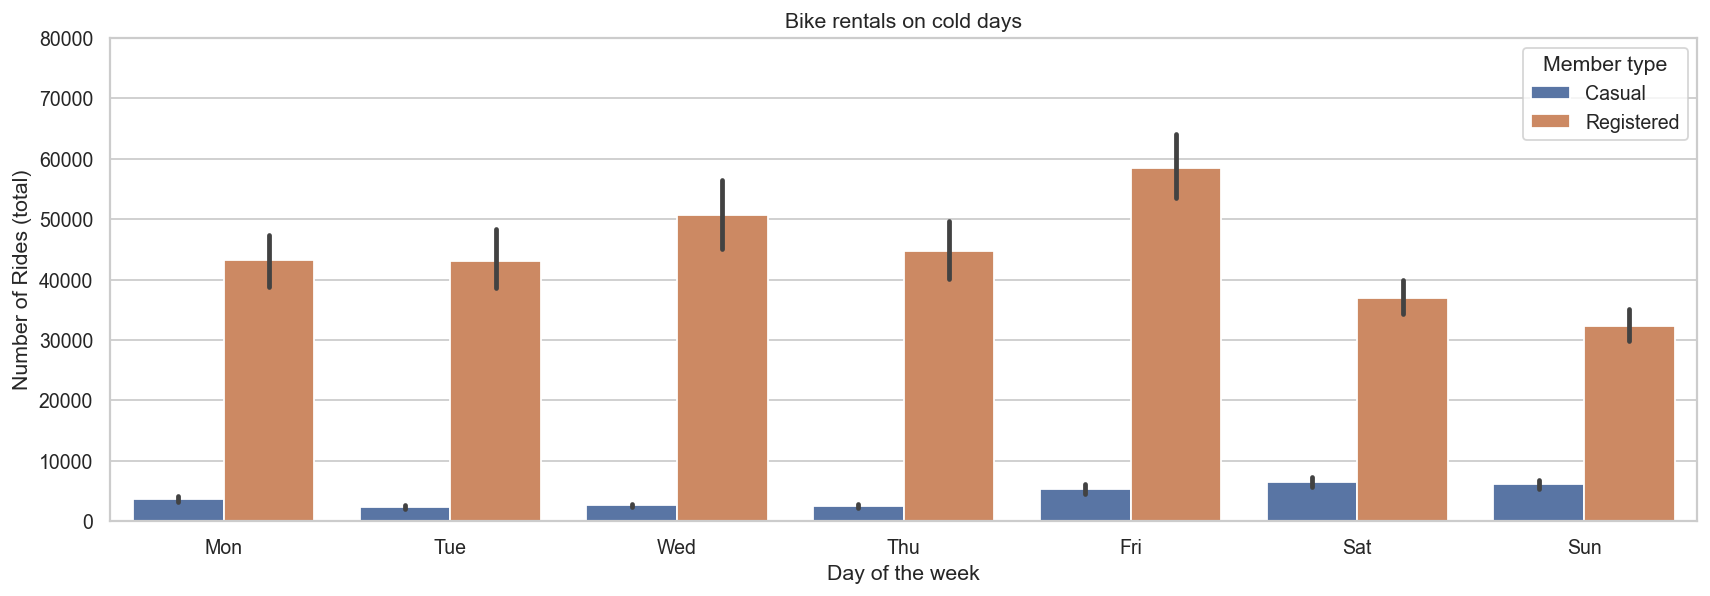

In [131]:
#cold weather usage, registered vs unregistered. Work with atemp as it takes humidity and wind into account

cold = hours.loc[(hours.atemp < 5)]

data_preproc = pd.DataFrame({'Day': cold["weekday"], 'Casual': cold["casual"], 'Registered': cold["registered"]})

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
sns.barplot(x='Day', y='value', hue='variable', data=pd.melt(data_preproc, ['Day']), estimator=sum)

plt.title('Bike rentals on cold days')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Day of the week')
plt.legend(title='Member type', loc='upper right')
plt.ylim(0, 80000)
#sns.despine(trim=True)
plt.show()

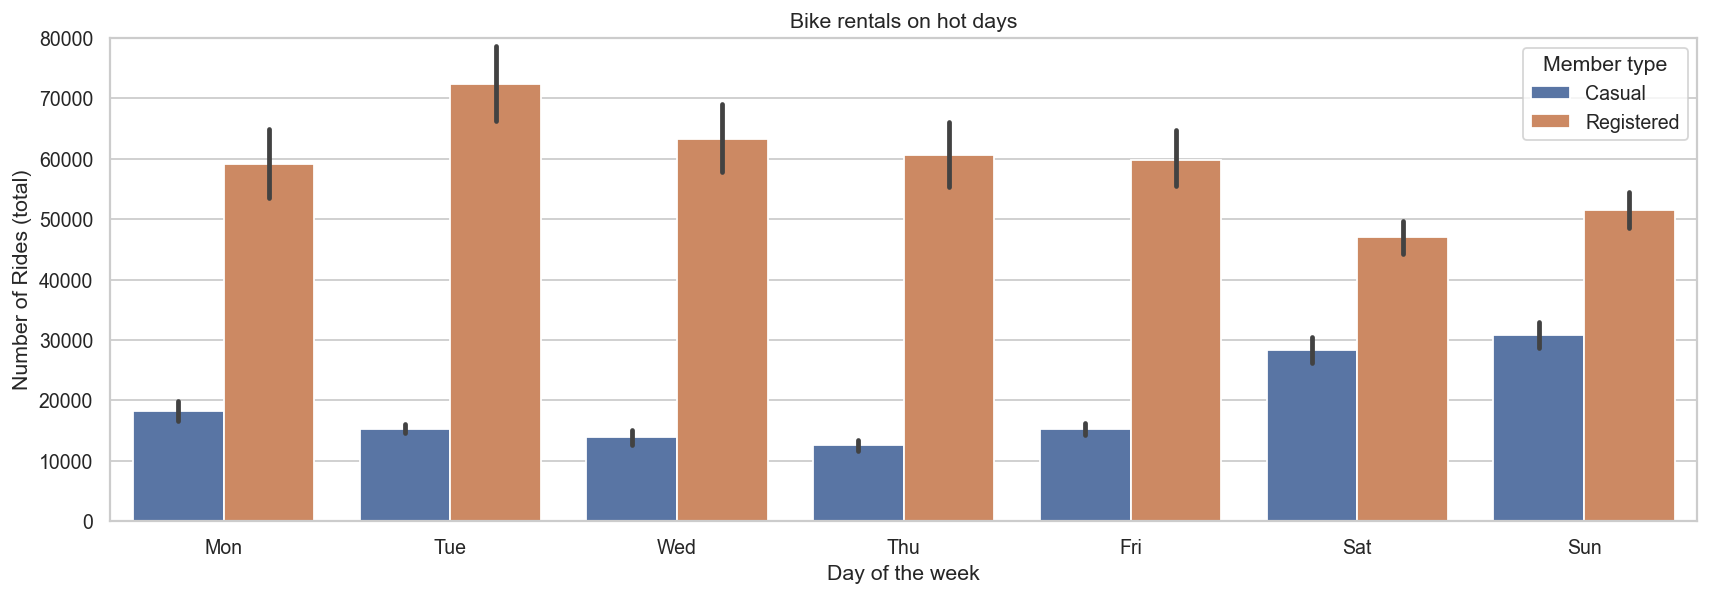

In [132]:
#hot weather usage, registered vs unregistered. Work with atemp as it takes humidity and wind into account

hot = hours.loc[(hours.atemp > 30)]

data_preproc = pd.DataFrame({'Day': hot["weekday"], 'Casual': hot["casual"], 'Registered': hot["registered"]})

plt.figure(figsize=(16,5), dpi=128)
sns.set_style("whitegrid")
sns.barplot(x='Day', y='value', hue='variable', data=pd.melt(data_preproc, ['Day']), estimator=sum)

plt.title('Bike rentals on hot days')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Day of the week')
plt.legend(title='Member type', loc='upper right')
plt.ylim(0, 80000)
#sns.despine(trim=True)
plt.show()

In [128]:
#$95 yearly for members. $1 unlock and 5c a min for casual. Look at 10min ride for casual as we do not have duration information. Plot against eachother. 
#from the data, no way of telling how many registered users there are. Look at max daily uses? But evidence suggests 
# that registered users avail of the bikes for work commutes while casual users use them at weekends - maximum utility of available bikes. 
#casual users are generally single trips while assume registered users do return journeys (to & from work) to estimate number of registered users based on maximum count in a day. 

#Regardless of season though, registered users will have paid up front regardless of how much they use

#days.registered.max()
display(hours.loc[[hours['registered'].idxmax()]])
display(days.loc[[days['registered'].idxmax()]])
display(hours.loc[[hours['casual'].idxmax()]])
display(days.loc[[days['casual'].idxmax()]])

,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,2012-09-12 18:00:00,Summer,No,Wed,Clear,23.0,25.0,44.0,17.0,91,886,977


,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
634,2012-09-26,Autumn,No,Wed,Clear,0.6,0.6,63.1,16.4,787,6946,7733


,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10477,2012-03-17 16:00:00,Winter,No,Sat,Clear,22.1,25.0,50.0,0.0,367,318,685


,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
504,2012-05-19,Spring,No,Sat,Clear,0.6,0.6,45.6,5.6,3410,4884,8294


In [129]:
#Pearson coefficient as usual correlation maps assume a linear relationship which is often not true.
correlations = hours.corr()
correlations["atemp"]

temp          1.0
atemp         1.0
hum          -0.1
windspeed    -0.1
casual        0.5
registered    0.3
cnt           0.4
Name: atemp, dtype: float64

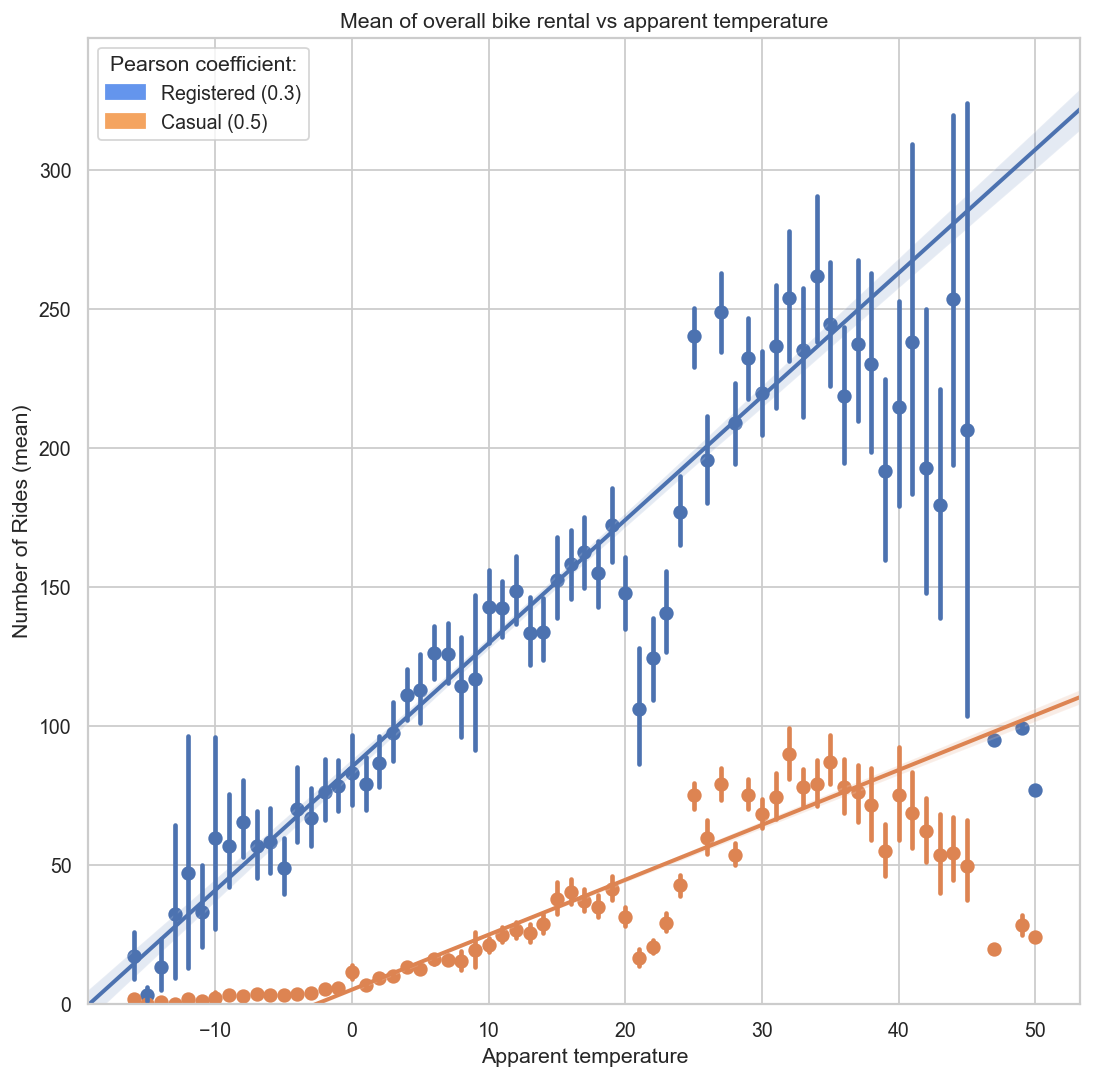

In [130]:
#  scatter plot apparent temperature vs cnt (hours) be aware that times of day will affect this.


#data_preproc = pd.DataFrame({'Temp': hours["atemp"], 'Casual': hours["casual"], 'Registered': hours["registered"]})

plt.figure(figsize=(10,10), dpi=128)
sns.set_style("whitegrid")
s1 = sns.regplot(x='atemp', y='registered', data=hours, ci=95, truncate=False, x_estimator=np.mean)
s2 = sns.regplot(x='atemp', y='casual', data=hours, ci=95, truncate=False, x_estimator=np.mean)
plt.ylim(0)
plt.title('Mean of overall bike rental vs apparent temperature')
plt.ylabel('Number of Rides (mean)')
plt.xlabel('Apparent temperature')
top_bar = mpatches.Patch(color='cornflowerblue', label='Registered (0.3)')
bottom_bar = mpatches.Patch(color='sandybrown', label='Casual (0.5)')
plt.legend(title='Pearson coefficient:', handles=[top_bar, bottom_bar], loc='upper left');